In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uoploaded file "{name}" with length {length} bytes'.format(
      name=fn, length = len(uploaded[fn])))

Saving IRIS.csv to IRIS.csv
User uoploaded file "IRIS.csv" with length 4617 bytes


In [17]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
import pandas as pd
import numpy as np
import seaborn as ams
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go


In [19]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Check the DATA**

In [20]:
df.shape

(150, 5)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# **Data preprocessing**

In [25]:
x= df.drop('species' , axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
sps = df['species'].value_counts()
sps

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [27]:
df.species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

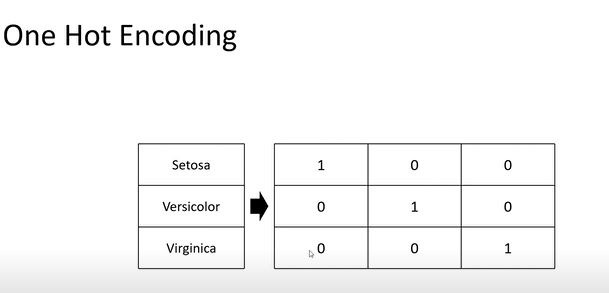

In [29]:
y = pd.get_dummies(df.species)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


# **Split the Dataset into 30 / 70 rule**

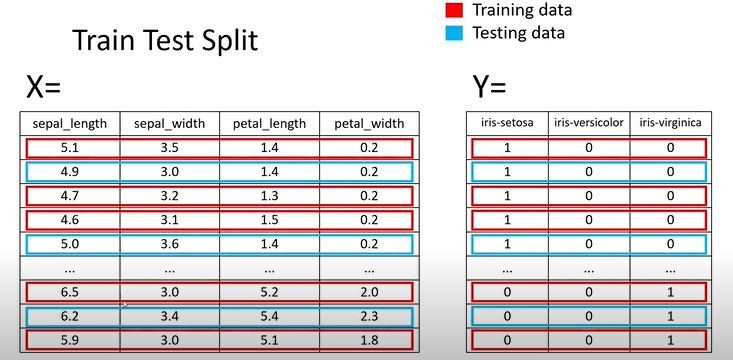

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3)

In [31]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
27,5.2,3.5,1.5,0.2
58,6.6,2.9,4.6,1.3
75,6.6,3.0,4.4,1.4
50,7.0,3.2,4.7,1.4
129,7.2,3.0,5.8,1.6


**Architecture of NN model**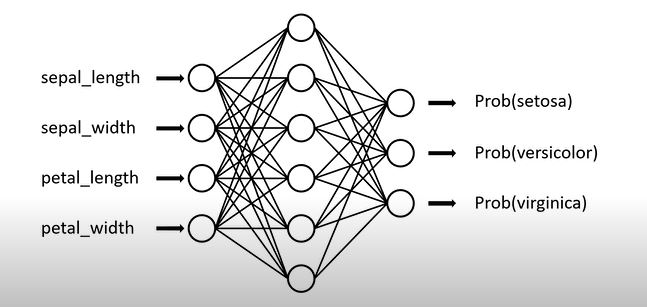

In [32]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
27,True,False,False
58,False,True,False
75,False,True,False
50,False,True,False
129,False,False,True
...,...,...,...
104,False,False,True
37,True,False,False
35,True,False,False
32,True,False,False


In [33]:
from keras import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(units = 6 , activation = "sigmoid"))
model.add(Dense(units = 3 , activation = 'softmax'))

In [35]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = "accuracy")

In [40]:
model.fit(x_train , y_train , epochs = 30 , batch_size = 5)

Epoch 1/30
21/21 [==============================] - 0s 8ms/step - loss: 0.7008 - accuracy: 0.9524
Epoch 2/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.9619
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.9619
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.9429
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.9429
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.9619
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.9619
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.9714
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.9524
Epoch 10/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.9619
Epoch 11/30
21/21 [

In [41]:
score = model.evaluate(x_test , y_test)
score


2/2 [==============================] - 0s 10ms/step - loss: 0.5052 - accuracy: 0.8222


[0.5051540732383728, 0.8222222328186035]

In [42]:
i = model.predict([[5.1 , 3.5 , 1.4 , 0.2]])
i


1/1 [==============================] - 0s 42ms/step


array([[0.96020716, 0.03757279, 0.00222007]], dtype=float32)

# **Achieved = 0.8857 on training dataset & 0.8222 on testing dataset**